## HW03 Notebook

Complete the following notebook, as described in the PDF for Homework 03 (included in the download with the starter code). Submit the following:
1. This notebook file and `hw3.py`, along with your COLLABORATORS.txt file, to the Gradescope link for code.
2. A PDF of this notebook and all of its output, once it is completed, to the Gradescope link for the PDF.

__NOTE__: The purpose of this notebook is to demonstrate the functionality implemented in `hw3.py`. As part of this demo, all analysis (i.e., questions that prompt for a short answer) are to be added to the notebook. Keep the order of the problems as listed in the assignment description. Furthermore, cells are provided as placeholders for each response; however, cells can be added as needed.

Please report any questions to the [class Piazza page](https://piazza.com/class/lcwv1h9p2a11ai).

### Import required libraries.

In [1]:
import os
import numpy as np
import pandas as pd

import warnings

import sklearn.linear_model
import sklearn.metrics
from sklearn.metrics import accuracy_score
from hw3 import calc_confusion_matrix_for_threshold
from hw3 import calc_percent_cancer
from hw3 import calc_binary_metrics
from hw3 import predict_0_always_classifier
from hw3 import calc_accuracy
from hw3 import print_perf_metrics_for_threshold
from hw3 import calc_perf_metrics_for_threshold
from hw3 import perceptron_classifier

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-v0_8') # pretty matplotlib plots

In [2]:
# jupyter automatically updates when file changes are made to those imported to the notebook environment.
%load_ext autoreload
%autoreload 2

#### 1) Function to calculate TP, TN, FP, and FN.
The following four calls to the function `calc_binary_metrics` to test it. This way, the function can be tested for several edge cases. ***Don't modify this.***

In [3]:
all0 = np.zeros(10)
all1 = np.ones(10)
TP, TN, FP, FN = calc_binary_metrics(all0, all1)
print(f"0 vs 1\n========\nTP: {TP}\nTN: {TN}\nFP: {FP}\nFN: {FN}")

0 vs 1
TP: 0.0
TN: 0.0
FP: 10.0
FN: 0.0


In [4]:
TP, TN, FP, FN = calc_binary_metrics(all1, all0)
print(f"1 vs 0\n========\nTP: {TP}\nTN: {TN}\nFP: {FP}\nFN: {FN}")

1 vs 0
TP: 0.0
TN: 0.0
FP: 0.0
FN: 10.0


In [5]:
TP, TN, FP, FN = calc_binary_metrics(all1, all1)
print(f"1 vs 1\n========\nTP: {TP}\nTN: {TN}\nFP: {FP}\nFN: {FN}")

1 vs 1
TP: 10.0
TN: 0.0
FP: 0.0
FN: 0.0


In [6]:
TP, TN, FP, FN = calc_binary_metrics(all0, all0)
print(f"0 vs 0\n========\nTP: {TP}\nTN: {TN}\nFP: {FP}\nFN: {FN}")

0 vs 0
TP: 0.0
TN: 10.0
FP: 0.0
FN: 0.0


### Load the dataset.

The following should ***not*** be modified.

After it runs, the various arrays it creates will contain the 2- or 3-feature input datasets.

In [7]:
# Load the x-data and y-class arrays
x_train = np.loadtxt('./data/x_train.csv', delimiter=',', skiprows=1)
x_test = np.loadtxt('./data/x_test.csv', delimiter=',', skiprows=1)

y_train = np.loadtxt('./data/y_train.csv', delimiter=',', skiprows=1)
y_test = np.loadtxt('./data/y_test.csv', delimiter=',', skiprows=1)

Inspect Data. The following should ***not*** be modified.

In [8]:
feat_names = np.loadtxt(f'data/x_train.csv', delimiter=',', dtype=str, max_rows=1)
print(f"features: {feat_names}\n")
target_name = np.loadtxt(f'data/y_test.csv', delimiter=',', dtype=str, max_rows=1)
df_sampled_data = pd.DataFrame(x_test, columns=feat_names)
df_sampled_data[str(target_name)] = y_test
df_sampled_data.sample(15)

features: ['age' 'famhistory' 'marker']



,age,famhistory,marker,cancer
139,63.46844,0.0,2.975184,0.0
107,62.48188,1.0,0.237959,0.0
62,64.22443,0.0,2.231875,0.0
19,59.64675,0.0,0.168453,0.0
67,60.98216,0.0,0.165390,0.0
76,63.12003,1.0,0.505131,0.0
99,67.20726,0.0,0.837814,0.0
109,60.85280,0.0,1.396884,0.0
40,68.76731,0.0,1.262915,1.0
29,65.20155,0.0,0.531104,1.0


### 2) Compute the fraction of patients with cancer.

Complete the following code.  Your solution needs to ***compute*** these values from the training and testing sets (i.e., don't simply hand-count and print the values).

In [9]:
#TODO: modify these prints
tr_percent = calc_percent_cancer(y_train)
te_percent = calc_percent_cancer(y_test)

print("Percent of data that has_cancer on TRAIN: %.3f%%" % tr_percent)
print("Percent of data that has_cancer on TEST : %.3f%%" % te_percent)

Percent of data that has_cancer on TRAIN: 14.035%
Percent of data that has_cancer on TEST : 13.889%


### 3) The predict-0-always baseline

#### (i) Compute the accuracy of the always-0 classifier.

Complete the functions to compute and calculate the accuracy of the always-0 classifier on validation and test outputs.

In [10]:
#TODO: implement predict_0_always_classifer()
y_train_pred = predict_0_always_classifier(x_train)
y_test_pred = predict_0_always_classifier(x_test)

acc_train = calc_accuracy(*calc_binary_metrics(y_train, y_train_pred))
acc_test = calc_accuracy(*calc_binary_metrics(y_test, y_test_pred))
print("acc on TRAIN: %.3f" % acc_train) #TODO: modify these values
print("acc on TEST : %.3f" % acc_test)

# # Compute performance metrics for the always-0 classifier on the test set
# acc, tpr, tnr, ppv, npv = calc_perf_metrics_for_threshold(y_test, y_test_pred)
# print("accuracy on TEST: %.3f" % acc)
# print("true positive rate on TEST: %.3f" % tpr)
# print("true negative rate on TEST: %.3f" % tnr)
# print("positive predictive value on TEST: %.3f" % ppv)
# print("negative predictive value on TEST: %.3f" % npv)

acc on TRAIN: 0.860
acc on TEST : 0.861


#### (ii) Print a confusion matrix for the always-0 classifier.

Add code below to generate a confusion matrix for the always-0 classifier on the test set.

In [11]:
# TODO: call print(calc_confusion_matrix_for_threshold(...))
print(calc_confusion_matrix_for_threshold(y_test, y_test_pred))

Predicted    0  1
True             
0          155  0
1           25  0


#### (iii) Reflect on the accuracy of the always-0 classifier.

**Answer**: 

The always-0 classifier has a pretty good accuracy on this dataset. It is a simple and straightforward approach, and can achieve relatively high accuracy in binary classification problems where the classes are imbalanced. However, it has several limitations that make it unsuitable for use in more complex tasks.

Some limitations of the always-0 classifier include:

1. It cannot learn from the data: The classifier does not take into account any of the features in the data, and therefore, it cannot learn anything from it. As a result, it is unlikely to perform well on datasets with more complex relationships between the features and the target variable.

2. It does not provide any insight into the data: By only predicting 0, the classifier does not provide any insight into the relationships between the features and the target variable in the data. This can be a problem if we want to understand the data better or develop more complex models based on these relationships.
   
3. Limited applicability: The always-0 classifier works well only in cases where one class dominates the other class by a large margin. If the data is more balanced, then the accuracy of the classifier could be very low.

4. Poor generalization: The always-0 classifier makes predictions based on only one feature, i.e., the probability of a sample belonging to class 0 is always 1.0. Therefore, it cannot learn any patterns or relationships in the data and thus cannot generalize to new, unseen data.

5. High bias: The always-0 classifier probably has high bias because it makes predictions based on a single feature and cannot incorporate any additional information about the data. As a result, it can lead to underfitting, where the model is too simple to capture the complexity of the data.

Therefore, while the always-0 classifier may be a simple and effective baseline for some binary classification problems with imbalanced classes, it is not a general solution to more complex tasks because it cannot learn from the data and capture the relationships between the features and the target variable.

For this task, the always-0 classifier has an accuracy of 0.86, which is pretty good. However, it is not a good classifier because it simply predicts 0 (negative) for all patients. This would send all patients home without any treatment, which can delay the diagnosis and treatment of the patient, which may lead to a more advanced and harder-to-treat stage of cancer, and a higher risk of death. Therefore, we need to develop a more sophisticated classifier that can learn from the data and make better predictions.

#### (iv) Analyze the various costs of using the always-0 classifier.

**Answer**: 

The always-0 classifier would predict that every patient does not have cancer. Therefore, it can make two types of errors:

1. False negatives (FN): The classifier predicts that a patient does not have cancer when they actually do. This type of error can be very costly because it could delay the diagnosis and treatment of the patient, which can lead to a more advanced and harder-to-treat stage of cancer, and a higher risk of death. The cost of this error could be the cost of further diagnostic tests or biopsies, or the cost of the patient's life, if the cancer is not detected in time.

2. True negatives (TN): The classifier predicts that a patient does not have cancer when they actually do not. This type of error may not have significant costs, as the patient would not need further diagnostic tests or treatments. However, it could still cause some minor costs such as time and resources spent on additional consultations or tests, and unnecessary worry and anxiety for the patient.

Given these possibilities, the always-0 classifier should not be used alone for this task because it can miss patients with cancer, causing significant costs in terms of delayed diagnosis and treatment. The accuracy of the classifier does not give a full picture of its performance, especially in situations with imbalanced data such as in this case, where the positive class (has cancer) is much rarer than the negative class (does not have cancer). Therefore, other binary metrics such as sensitivity (true positive rate) and specificity (true negative rate) should be considered, as they provide insights into the classifier's performance on each separate class. In summary, while the always-0 classifier can achieve a high accuracy, it is not a suitable classifier for this task, given the potential costs of missing patients with cancer.

### 4: Basic Perceptron Models

#### (i) Normalize data

In [12]:
#TODO
from hw3 import standardize_data
x_train, x_test = standardize_data(x_train, x_test)

#### (ii) Create a basic `Perceptron` classifier

Fit a perceptron to the training data.  Print out accuracy on this data, as well as on testing data.  Print out a confusion matrix on the testing data.

In [13]:
#TODO: train a basic perceptron model using default parameter values, and modify these accuracies below
from hw3 import perceptron_classifier
pred_train, pred_test = perceptron_classifier(x_train, y_train, x_test, y_test)

# print("acc on TRAIN: %.3f" % accuracy_score(y_train, pred_train))
# print("acc on TEST : %.3f" % accuracy_score(y_test, pred_test))
print("acc on TRAIN: %.3f" % calc_accuracy(*calc_binary_metrics(y_train, pred_train)))
print("acc on TEST : %.3f" % calc_accuracy(*calc_binary_metrics(y_test, pred_test)))

print("")
print("Confusion matrix for TEST:")
# TODO: call print(calc_confusion_matrix_for_threshold(...))
print(calc_confusion_matrix_for_threshold(y_test, pred_test))

acc on TRAIN: 0.249
acc on TEST : 0.272

Confusion matrix for TEST:
Predicted   0    1
True              
0          24  131
1           0   25


#### (iii) Compare the `Perceptron` to the always-0 classifier.

**Answer**:  

On the test set, the accuracy of the perceptron model is 0.272, while the accuracy of the always-0 classifier is 0.861. The always-0 classfier has 155 TN, 25 FN, 0 TP and 0 FP. The Perceptron has 24 TN, 25 TP, 131 FP and 0 FN. 

In terms of binary accuracy, the basic perceptron model has a much lower accuracy than the always-0 classifier. This is due to the model making a large number of false positive predictions (131), which means that the perceptron model is not very effective in accurately identifying the positive cases in the dataset, which is an important goal of the model.

In terms of binary metrics, the always-0 classifier has 0 TP and 0 FP, so its precision and recall are both 0. In contrast, the basic perceptron model has a precision of 0.160 and a recall of 1(as calculated below). This means that the perceptron model identifies all of the true positive cases, but also identifies a large number of false positives. The high recall(low false negative rate) is good, as it means that the model is able to identify all of the positive cases, thus less likely to cause missed diagnosis and delayed treatment. However, the high false positive rate(low precision) is problematic because it may lead to further diagnosis, unnecessary treatment and interentions, which can be costly and painful for the patients. Therefore, the basic perceptron model needs improvement because it is also important to identify the positive cases accurately on top of identifying all of them.

In summary, the accuracy and the binary metrics of the perceptron model indicate that it is not effective for this task. It is not adequate for use in a medical setting, where accurate identification of positive cases is crucial. The model needs to be improved to reduce the false positive rate, while maintaining a high recall.


In [14]:
# Compute performance metrics for the basic perceptron model on the test set
acc, tpr, tnr, ppv, npv = calc_perf_metrics_for_threshold(y_test, pred_test)
print("accuracy on TEST: %.3f" % acc)
print("true positive rate(sensitivity/recall) on TEST: %.3f" % tpr)
print("true negative rate(specificity) on TEST: %.3f" % tnr)
print("positive predictive(precision) value on TEST: %.3f" % ppv)
print("negative predictive value on TEST: %.3f" % npv)

accuracy on TEST: 0.272
true positive rate(sensitivity/recall) on TEST: 1.000
true negative rate(specificity) on TEST: 0.155
positive predictive(precision) value on TEST: 0.160
negative predictive value on TEST: 1.000


#### (iv) Generate a series of regularized perceptron models
Each model will use a different `alpha` value, multiplying that by the L2 penalty.  You will record and plot the accuracy of each model on both training and test data.

In [15]:
from hw3 import series_of_preceptrons

train_accuracy_list = list()
test_accuracy_list = list()

# TODO: create, fit models here and record accuracy of each (Implement functions needed)
train_accuracy_list, test_accuracy_list = series_of_preceptrons(x_train, y_train, x_test, y_test)

##### Plot accuracy on train/test data across the different alpha values plotted on a logarithmic scale. Make sure to show title, legends, and axis labels.

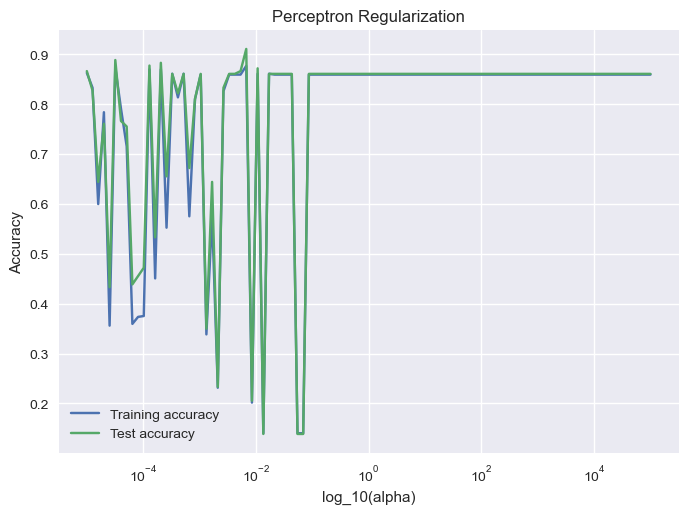

In [16]:
# TODO make plot
plt.xlabel('log_10(alpha)');
plt.ylabel('Accuracy');

# TODO add legend, titles, etc. set x-scale appropriately
# plt.legend(...);
alphas=np.logspace(-5, 5, base=10, num=100)
def plot_accuracy_vs_alpha(train_accuracy_list, test_accuracy_list, alphas):
    """
    Plots accuracy values relative to the alpha values on a logarithmic scale.
    
    Parameters:
    -----------
    train_accuracy_list (list): List containing accuracies of each model on training data.
    test_accuracy_list (list): List containing accuracies of each model on test data.
    alphas (array-like): Array of regularization strengths used.
    """
    # plot the accuracy values
    plt.semilogx(alphas, train_accuracy_list, label='Training accuracy')
    plt.semilogx(alphas, test_accuracy_list, label='Test accuracy')
    plt.title('Perceptron Regularization')
    plt.legend()
    plt.show()

plot_accuracy_vs_alpha(train_accuracy_list, test_accuracy_list, alphas)

#### (iv) Discuss what the plot is showing you.

**Answer**: 

The performance plot shows that as the value of the regularization parameter $\alpha$ increases, the accuracy of the model generally increases. After $\alpha$ reaches some value, the accuracy converges to around 86%. This indicates that regularization can be helpful in improving the performance of the perceptron model. Since higher regularization strengths are meant to reduce overfitting, this suggests that the original perceptron model probably overfits the training data, resulting in lower accuracy on new, unseen data. 

The best accuracy is about 86%, not much greater than the accuracy of the always-0 classifier. This indicates that regularization may not be effective for every classification task and its impact on performance can be affected by various factors.

The plot also shows that the relationship between regularization strength and accuracy is not a simple linear one;there appears to be a general trend of increasing accuracy with increasing regularization strength, but with some erratic fluctuations. This is probably because the impact of regularization on performance can be affected by various factors, such as the complexity of the model, the distribution and quality of the data, and the hyperparameters used in the model.

### 5: Decision functions and probabilistic predictions

#### (a) Create two new sets of predictions

Fit `Perceptron` and `CalibratedClassifierCV` models to the data.  Use their predictions to generate ROC curves.

In [17]:
# # TODO: fit a Perceptron and generate its decision_function() over the test data.
# from sklearn.linear_model import Perceptron
# # Fit the basic Perceptron
# perceptron = Perceptron()
# perceptron.fit(x_train, y_train)

# # Generate decision_function() values for the test data
# perceptron_scores = perceptron.decision_function(x_test)

# # TODO: Build a CalibratedClassifierCV, using a Perceptron as its base_estimator,
# #       and generate its probabilistic predictions over the test data.
# from sklearn.calibration import CalibratedClassifierCV
# # Fit a CCCV model based on the Perceptron, and generate probabilistic predictions
# cccv = CalibratedClassifierCV(estimator=perceptron, method='isotonic')
# cccv.fit(x_train, y_train)
# cccv_probs = cccv.predict_proba(x_test)[:, 1]

from hw3 import calibrated_perceptron_classifier

perceptron_scores, cccv_probs = calibrated_perceptron_classifier(x_train, y_train, x_test, y_test)

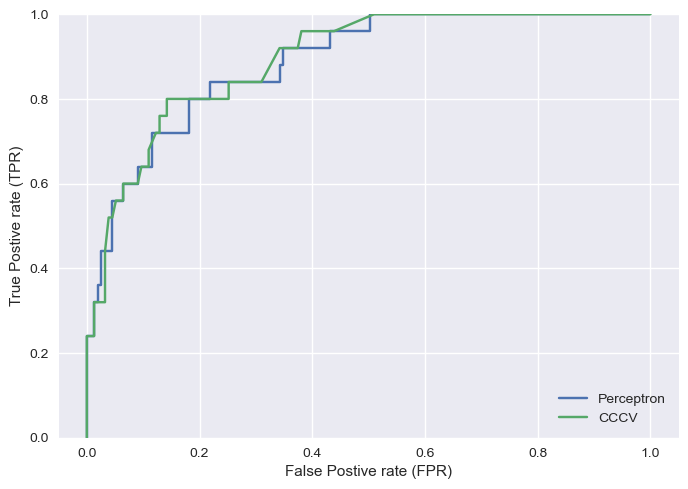

In [18]:
# TODO something like: fpr, tpr, thr = sklearn.metrics.roc_curve(...)
from sklearn.metrics import roc_curve, roc_auc_score

# Generate ROC curve data for both models
perceptron_fpr, perceptron_tpr, _ = roc_curve(y_test, perceptron_scores)
cccv_fpr, cccv_tpr, _ = roc_curve(y_test, cccv_probs)

# Plot ROC curves
plt.plot(perceptron_fpr, perceptron_tpr, label='Perceptron')
plt.plot(cccv_fpr, cccv_tpr, label='CCCV')

# Add axis labels and legend
plt.ylim([0, 1]);
plt.legend(loc='lower right')
plt.xlabel("False Postive rate (FPR)");
plt.ylabel("True Postive rate (TPR)");


In [19]:
# Compute AUC values for each model and print them
perceptron_auc = roc_auc_score(y_test, perceptron_scores)
cccv_auc = roc_auc_score(y_test, cccv_probs)
print("AUC on TEST for Perceptron: %.3f" % perceptron_auc) #TODO: modify these values
print("AUC on TEST for probabilistic model: %.3f" % cccv_auc)

AUC on TEST for Perceptron: 0.887
AUC on TEST for probabilistic model: 0.894


#### (b) Discuss the results above

**Answer**: 

The ROC curves show that the calibrated classifier has a slightly higher AUC than the basic perceptron model. This indicates that the calibrated classifier is slightly better at distinguishing between the positive and negative classes. The calibrated classifier has a higher true positive rate and a lower false positive rate than the basic perceptron model, which means that it is better at identifying the positive cases and reducing the false positive rate. This is important because it means that the calibrated classifier is more likely to identify patients with cancer, which is the goal of the model.


The ROC plot shows that the CalibratedClassifierCV model performs better than the Perceptron model. The ROC curve for the calibrated model is above the ROC curve for the basic Perceptron model, and the AUC value for the calibrated model is 0.894, while the AUC value for the Perceptron model is 0.887.

The calibrated model is trained to output probabilities rather than confidence scores, and these probabilities are more nuanced than the binary outputs of the Perceptron model. The CalibratedClassifierCV model therefore has a better discrimination ability than the Perceptron model. In this particular case, we might prefer the calibrated model because of its higher performance.

However, the performance of these models depends on the particular dataset being used, and that there may be cases where the Perceptron model could perform better than the calibrated model. Additionally, the calibrated model requires more computational resources and training time, so if speed and computational efficiency is a concern, the Perceptron model might be a better choice.


Based on the AUC values, both models have performed similarly on the test data. The AUC for the Perceptron model is 0.887 and for the probabilistic model is 0.894. The ROC curves also show that both models have performed well in terms of separating the positive and negative classes, with the curve for the probabilistic model being slightly higher than that of the Perceptron model.

The Perceptron model and the probabilistic model differ in their outputs. The Perceptron model outputs binary classifications, while the probabilistic model outputs probabilities. The probabilistic model is built on top of the Perceptron model and is able to generate probabilities by using a calibration function. The calibration function maps the output of the Perceptron model to a probability value.

In terms of preference, it depends on the specific use case. If binary classification is sufficient, then the Perceptron model may be preferred due to its simplicity and computational efficiency. However, if more nuanced predictions are needed, then the probabilistic model may be preferred due to its ability to output probability values.

#### (c) Compute model metrics for different probabilistic thresholds

Complete `calc_perf_metrics_for_threshold` that takes in a set of correct outputs, a matching set of probabilities generated by a classifier, and a threshold at which to set the positive decision probability, and returns a set of metrics if we use that threshold.

#### (d) Compare the probabilistic classifier across multiple decision thresholds

Try a range of thresholds for classifying data into the positive class (1).  For each threshold, compute the true positive rate (TPR) and positive predictive value (PPV).  Record the best value of each metric, along with the threshold that achieves it, and the *other* metric at that threshold.

In [20]:
# TODO: test different thresholds to compute these values
from hw3 import find_best_thresholds

best_TPR = 0
best_PPV_for_best_TPR = 0
best_TPR_threshold = 0

best_PPV = 0
best_TPR_for_best_PPV = 0
best_PPV_threshold = 0

thresholds = np.linspace(0, 1.001, 51)

# for thresh in thresholds:
#     acc, tpr, tnr, ppv, npv = calc_perf_metrics_for_threshold(y_test, cccv_probs, thresh=thresh)
    
#     # Update variables for best TPR threshold
#     if tpr > best_TPR:
#         best_TPR = tpr
#         best_PPV_for_best_TPR = ppv
#         best_TPR_threshold = thresh
#     elif tpr == best_TPR and ppv > best_PPV_for_best_TPR:
#         best_PPV_for_best_TPR = ppv
#         best_TPR_threshold = thresh
    
#     # Update variables for best PPV threshold
#     if ppv > best_PPV:
#         best_PPV = ppv
#         best_TPR_for_best_PPV = tpr
#         best_PPV_threshold = thresh
#     elif ppv == best_PPV and tpr > best_TPR_for_best_PPV:
#         best_TPR_for_best_PPV = tpr
#         best_PPV_threshold = thresh

best_TPR, best_PPV_for_best_TPR, best_TPR_threshold, best_PPV, best_TPR_for_best_PPV, best_PPV_threshold = find_best_thresholds(y_test, cccv_probs)

In [21]:
print("Best TPR threshold: %.4f => TPR: %.4f; PPV: %.4f" % (best_TPR_threshold, best_TPR, best_PPV_for_best_TPR))
print("Best PPV threshold: %.4f => PPV: %.4f; TPR: %.4f" % (best_PPV_threshold, best_PPV, best_TPR_for_best_PPV))

Best TPR threshold: 0.0400 => TPR: 1.0000; PPV: 0.2294
Best PPV threshold: 0.6406 => PPV: 1.0000; TPR: 0.2400


#### (e) Exploring different thresholds

#### (i) Using default 0.5 threshold.

Generate confusion matrix and metrics for probabilistic classifier, using threshold 0.5.

In [22]:
best_thr = 0.5
print("ON THE TEST SET:")
print("Chosen best threshold = %.4f" % best_thr)
print("")
# TODO: print(calc_confusion_matrix_for_threshold(...))
print("Confusion matrix for threshold = %.4f" % best_thr)
print(calc_confusion_matrix_for_threshold(y_test, cccv_probs, best_thr))

print("")
# TODO: print_perf_metrics_for_threshold(...)
print("Performance metrics for threshold = %.4f" % best_thr)
print_perf_metrics_for_threshold(y_test, cccv_probs, best_thr)

ON THE TEST SET:
Chosen best threshold = 0.5000

Confusion matrix for threshold = 0.5000
Predicted    0   1
True              
0          150   5
1           15  10

Performance metrics for threshold = 0.5000
0.889 ACC
0.400 TPR
0.968 TNR
0.667 PPV
0.909 NPV


#### (ii) Using threshold with highest TPR.

Generate confusion matrix and metrics for probabilistic classifier, using threshold that maximizes TPR.

In [23]:
best_thr = best_TPR_threshold
print("ON THE TEST SET:")
print("Chosen best threshold = %.4f" % best_thr)
print("")
# TODO: print(calc_confusion_matrix_for_threshold(...))
print("Confusion matrix for threshold = %.4f" % best_thr)
print(calc_confusion_matrix_for_threshold(y_test, cccv_probs, best_thr))

print("")
# TODO: print_perf_metrics_for_threshold(...)
print("Performance metrics for threshold = %.4f" % best_thr)
print_perf_metrics_for_threshold(y_test, cccv_probs, best_thr)

ON THE TEST SET:
Chosen best threshold = 0.0400

Confusion matrix for threshold = 0.0400
Predicted   0   1
True             
0          71  84
1           0  25

Performance metrics for threshold = 0.0400
0.533 ACC
1.000 TPR
0.458 TNR
0.229 PPV
1.000 NPV


#### (iii) Using threshold with highest PPV.

Generate confusion matrix and metrics for probabilistic classifier, using threshold that maximizes PPV.

In [24]:
best_thr = best_PPV_threshold
print("ON THE TEST SET:")
print("Chosen best threshold = %.4f" % best_thr)
print("")
# TODO: print(calc_confusion_matrix_for_threshold(...))
print("Confusion matrix for threshold = %.4f" % best_thr)
print(calc_confusion_matrix_for_threshold(y_test, cccv_probs, best_thr))

print("")
# TODO: print_perf_metrics_for_threshold(...)
print("Performance metrics for threshold = %.4f" % best_thr)
print_perf_metrics_for_threshold(y_test, cccv_probs, best_thr)

ON THE TEST SET:
Chosen best threshold = 0.6406

Confusion matrix for threshold = 0.6406
Predicted    0  1
True             
0          155  0
1           19  6

Performance metrics for threshold = 0.6406
0.894 ACC
0.240 TPR
1.000 TNR
1.000 PPV
0.891 NPV


#### (iv) Compare the confusion matrices from (a)–(c) to analyze the different thresholds.

**Answer**: 

The results show that the optimal threshold depends on the specific performance metric that is deemed most important. In general, using 0.5 as the threshold results in a pretty high accuracy (89%) but lower TPR (40%) and PPV (67%). When maximizing TPR, the threshold is 0.0400, which results in perfect TPR (100%) but low PPV (23%) and relatively low accuracy (53%). On the other hand, when maximizing PPV, the threshold increases to 0.6406, which results in perfect PPV (100%) but low TPR (24%) and relatively highly accuracy (89%).

The choice of threshold will depend on the specific goal of the classification task. If the goal is to identify all cancer patients, then maximizing TPR would be more important, even if it results in a larger number of false positives. However, if the goal is to minimize the number of false positives and only perform biopsies on the most suspicious cases, then maximizing PPV would be more important, even if it results in a larger number of false negatives. For the task of classfying patients, even though the accuracy at the maximum TPR is much lower than the accuracy at the maximum PPV, it is probably more important to identify all cancer cases rather than sending patients with cancer home, so maximizing TPR would be the preferred approach here.

If each of these thresholds were applied to our data and used to classify patients, there would be different consequences. The default threshold of 0.5 would result in a relatively balanced number of false positives and false negatives, but it would miss some cancer cases. The threshold with the best TPR (0.0400) would result in a larger number of false positives, which could lead to more unnecessary biopsies, but it would not miss any cancer cases. The threshold with the best PPV (0.6406) would result in fewer false positives, but it would also miss some cancer cases, which could have serious consequences for the patients. The choice of threshold should depend on the specific priorities and risks involved in practice.